# Numerische Methoden für Differentialgleichungen

## Aufgabenblatt 5
*gelöst von Stollmayer Max*

### Aufgabe 1

Zu implementieren ist eine Finite-Differenzen-Methode für $\begin{cases} u''(x)=1,\quad x \in [a,b]\\ u(a)=u_a,\quad u(b)=u_b \end{cases}$. Davon sind die Fehler mithilfe der Maximumsnorm und die Konvergenzraten zu bestimmen.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use("seaborn")
plt.rcParams['figure.figsize'] = [12.8, 7.2]

In [2]:
def TDMA(T, y):
    '''
    The Tri-Diagonal-Matrix-Algorithm is a special case of Gaussian elimination for tridiagonal matrices.
    Returns solution x of T x = y.
    
    T ... tridiagonal matrix
    y ... vector
    '''    
    
    n = len(y)
    
    if T.shape != (n, n):
        raise Exception(f"Input shapes are mismatched. Matrix: {T.shape}, Vector: ({n}).")
    
    for k in range(n):
        if T[k,k] == 0:
            raise Exception(f"Matrix has zero on diagonal at Matrix[{k},{k}].")
    
    c = np.zeros(n-1)
    x = d = np.zeros(n)

    c[0] = T[0,1] / T[0,0]
    d[0] = y[0] / T[0,0]
    
    for k in range(1, n-1):
        c[k] = T[k,k+1] / (T[k,k] - c[k-1] * T[k+1,k])
        d[k] = (y[k] - d[k-1] * T[k+1,k]) / (T[k,k] - c[k-1] * T[k+1,k])
    
    d[n-1] = x[n-1] = (y[n-1] - d[n-2] * T[n-1,n-2]) / (T[n-1,n-1] - c[n-2] * T[n-1,n-2])
    
    for k in range(n-2,-1,-1):
        x[k] = d[k] - c[k] * x[k+1]
    
    return x

In [3]:
def FDM(f, grid, ua, ub):
    '''
    Finite difference method for second order ODE on an interval [a, b].
    Returns list of function values on the given grid.
    
    f ...... function of ODE: u''(x) = f(x)
    grid ... discretized interval: [x_0 = a, x_1, ..., x_N-1, x_N = b]
    ua ..... first boundary value
    ub ..... second boundary value
    '''
    
    grid = np.array(grid)
    N = len(grid)
    
    h = grid[1:] - grid[:-1]                      # h[i] = grid[i+1] - grid[i], i=0..N-2
    
    a = 1 / (h[1:-1] * h[2:])                     # a[i] = 1 / (h[i-1] * h[i]), i=2..N-2
    b = -(h[:-1] + h[1:]) / (h[:-1] * h[1:]**2)   # b[i] = -(h[i-1] + h[i]) / (h[i-1] * h[i]**2), i=1..N-2
    c = 1 / h[1:-1]**2                            # c[i] = 1 / h[i]**2, i=1..N-3
        
    y = f(grid[1:-1])                             # y[i] = f(grid[i]), i=1..N-2
    y[0] -= ua / (h[0] * h[1])
    y[-1] -= ub / h[-1]**2
    
    T = np.diagflat(a,-1) + np.diagflat(b) + np.diagflat(c,1)
    
    return np.array([ua, *TDMA(T, y), ub])

In [4]:
def error(vals1, vals2):
    return max(np.abs(vals1 - vals2))

def order(e, h):
    return np.log(e) / np.log(h)

steps | error    | rate
   10 | 1.44E-15 |   21
   20 | 4.50E-15 |   14
   40 | 9.55E-15 |   11
   80 | 1.31E-14 |    9
  160 | 7.16E-14 |    7
  320 | 6.32E-13 |    6


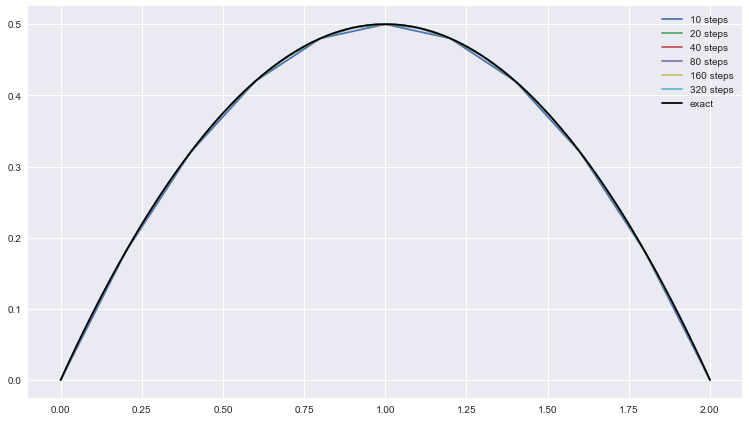

In [5]:
def f(x):
    return -1 if isinstance(x, (int, float)) else -np.ones(len(x))

def exact(x):
    return -x**2 / 2 + x

steps = 10 * 2**np.arange(6)
a = 0
b = 2
ua = ub = 0

errors = ()
rates = ()

for N in steps:
    h = (b - a) / N
    grid = a + h * np.arange(N+1)
    
    u = FDM(f, grid, ua, ub)
    
    e = error(u, exact(grid))
    errors += (e,)
    rates += (order(e, h),)
    
    plt.plot(grid, u, label=f"{N} steps")

rates = order(errors,(b-a)/steps)
print("steps | error    | rate")
for N, e, r in zip(steps, errors, rates):
    print(f"  {N:3.0f} | {e:.2E} |   {r:2.0f}")

x = np.linspace(0, 2, 101)
plt.plot(x, exact(x), "k", label="exact")
plt.legend()
plt.show()

### Aufgabe 2

Analog wie Aufgabe 1 für $\begin{cases} u''(x)=x,\quad x \in [0,2]\\ u(0)=1,\quad u(2)=2 \end{cases}$.

steps | error    | rate
   10 | 7.11E-15 |   20
   20 | 2.18E-14 |   14
   40 | 3.86E-14 |   10
   80 | 8.04E-14 |    8
  160 | 3.62E-13 |    7
  320 | 3.17E-12 |    5


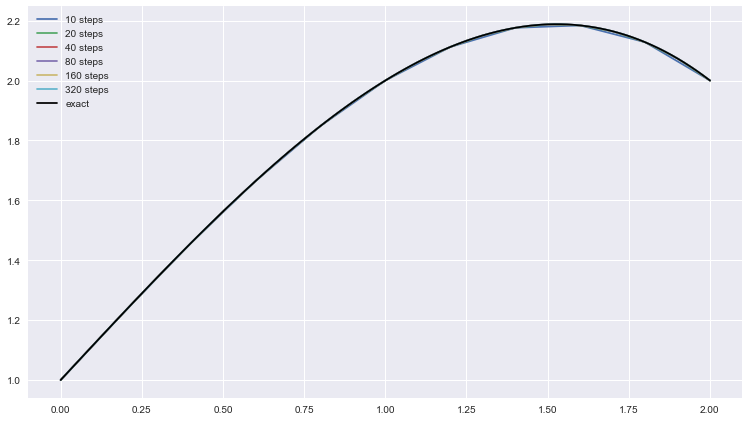

In [6]:
def f(x):
    return -x

def exact(x):
    return (-x**3 + 7*x + 6) / 6

a = 0
b = 2
ua = 1
ub = 2

errors = ()
rates = ()

for N in steps:
    h = (b - a) / N
    grid = a + h * np.arange(N+1)
    
    u = FDM(f, grid, ua, ub)
    e = error(u, exact(grid))
    errors += (e,)
    rates += (order(e, h),)
    
    plt.plot(grid, u, label=f"{N} steps")

print("steps | error    | rate")
for N, e, r in zip(steps, errors, rates):
    print(f"  {N:3g} | {e:.2E} |   {r:2.0f}")

x = np.linspace(0, 2, 101)
plt.plot(x, exact(x), "k", label="exact")
plt.legend()
plt.show()